In [1]:
import numpy as np


import pickle, os
import glob
import lrrouting as ldr

/Users/parshakova.tanya/opt/anaconda3/envs/routing/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mtypes = ["honolulu", "manhattan",  "ego_social", "rand_lognormal"]
names = ["Honolulu", "Manhattan",  "Social ego", "Random"]

In [3]:
coeffs = [1, 10, 100]
graphs = {coeff:{} for coeff in coeffs}
for j, mtype in enumerate(mtypes):
    name = names[j]
    for coeff in coeffs:
        search_pattern = os.path.join("outputs/", f'*{mtype + "_nsp%d_"%coeff}*.pickle')
        matching_files0 = sorted(glob.glob(search_pattern))
        ranks = np.zeros(len(matching_files0))
        for i, fname in enumerate(matching_files0):
            rank = int(fname.split("_")[len(mtype.split("_")) + 1][4:])
            ranks[i] = rank
        idx = np.argsort(ranks)
        matching_files = [matching_files0[i] for i in idx]

        graphs[coeff][name] = {"subopt":[], "delta_r":[], "delta_c":[]}
        for i, fname in enumerate(matching_files):
            rank = int(fname.split("_")[len(mtype.split("_")) + 1][4:])
            with open(fname, 'rb') as handle:
                d1 = pickle.load(handle)[rank]
            if mtype == "ego_social":
                rats = d1["symm"]
            else:
                rats = d1["symm+asymm"]
            graphs[coeff][name]["subopt"] += [np.median(rats["ratios"])]
            graphs[coeff][name]["delta_r"] += [rats["r_rel_diff"][1]*100]
            graphs[coeff][name]["delta_c"] += [rats["c_rel_diff"][1]*100]

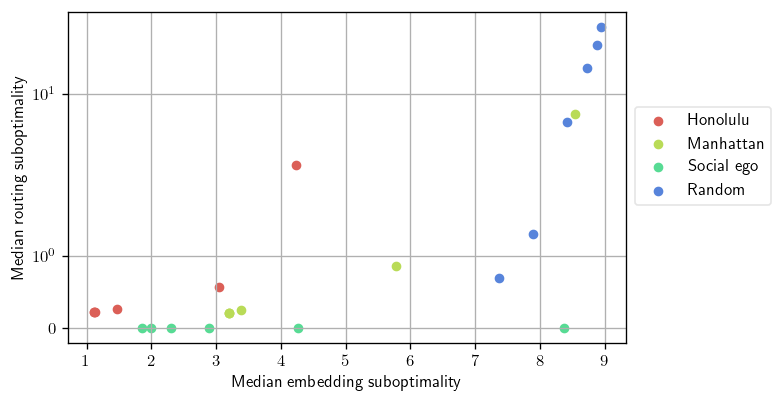

In [4]:
ldr.plot_emb_vs_routing_subopt(graphs, names, coeff = 100, msize=100, dpi=120, figsize=(6, 4), marker='.', savefig=True)

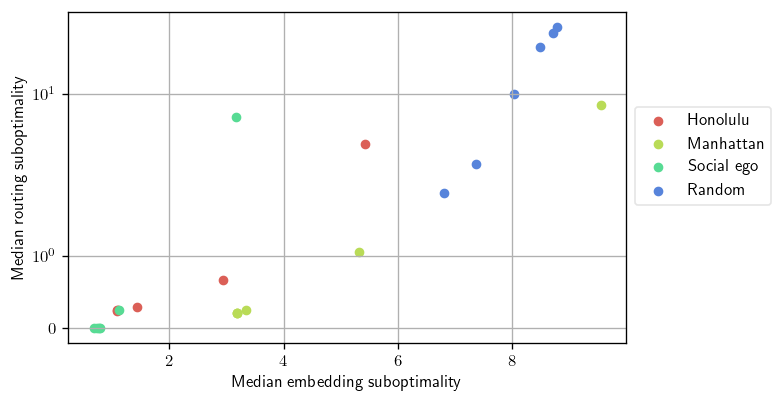

In [5]:
ldr.plot_emb_vs_routing_subopt(graphs, names, coeff=10, msize=100, dpi=120, figsize = (6, 4), marker = '.', savefig=True)

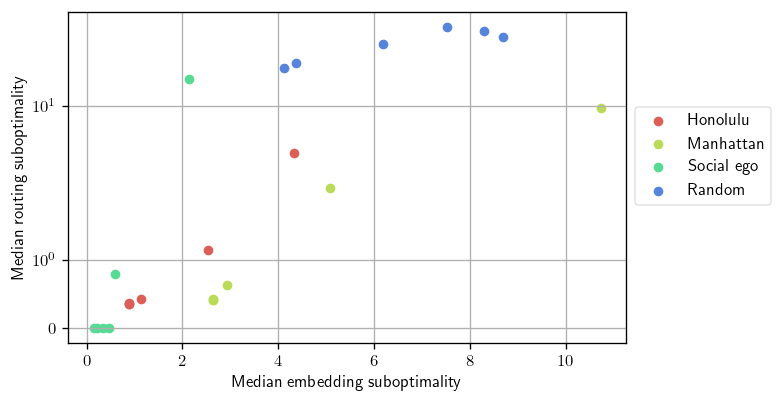

In [6]:
ldr.plot_emb_vs_routing_subopt(graphs, names, coeff=1, msize=100, dpi=120, figsize = (6, 4), marker = '.', savefig=True)